In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  


In [5]:
regression_data_filepath = '/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/data/regression/'
plots_filepath = '/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/results/plots/'

In [6]:
#these will be updated
data_09 = pd.read_csv(regression_data_filepath+"demog_no_dummies_2009.csv").rename({"Percent of population 25 years and over with Bachelor's degree": "Pct with Bachelor's degree"}, axis=1)
data_1314 = pd.read_csv(regression_data_filepath+"demog_no_dummies_201314.csv").rename({"Percent of population 25 years and over with Bachelor's degree": "Pct with Bachelor's degree"}, axis=1)
# data_1517 = pd.read_csv(regression_data_filepath+"demog_no_dummies_20151617.csv").rename({"Percent of population 25 years and over with Bachelor's degree": "Pct with Bachelor's degree"}, axis=1)
data_09.head()

,Geoid,Pct with Bachelor's degree,% below poverty level,% Single Family,% Owner Occupied,Percent NH White alone,Percent NH Black or African African alone,Percent NH Asian alone,Percent Hispanic,Total number of housing units,Median home value,Median income,Total Loans,Year_x,Tract_y,type,County,CRA Eligible,CRA
0,6001400100,0.345,0.031,0.912439,0.895260,0.769150,0.041435,0.110724,0.007312,1439,1000000.0,186439.0,13.0,2009,4001.0,high,Alameda County,not eligible,0
1,6001400300,0.321,0.069,0.478758,0.405179,0.714142,0.099114,0.075544,0.085214,2801,718100.0,66638.0,23.0,2009,4003.0,mid,Alameda County,not eligible,0
2,6001400400,0.440,0.040,0.555446,0.433809,0.698082,0.092588,0.078143,0.062988,2020,790500.0,80391.0,18.0,2009,4004.0,mid,Alameda County,not eligible,0
3,6001400500,0.281,0.060,0.444380,0.437722,0.419526,0.346635,0.066241,0.115988,1735,572000.0,50658.0,21.0,2009,4005.0,mod,Alameda County,eligible,1
4,6001400600,0.519,0.264,0.632653,0.470756,0.338305,0.473150,0.032220,0.059666,784,586700.0,39802.0,12.0,2009,4006.0,mod,Alameda County,eligible,1


In [207]:
covariates = np.array(["Pct with Bachelor's degree","% below poverty level",
      "% Single Family", "% Owner Occupied", "Percent NH White alone", "Total number of housing units", 
                 "Median home value","Median income", "Total Loans"])

In [208]:
make_float = lambda x: "{:,.2f}".format(x)
# s.apply(make_float)

In [209]:
# for col in data_09.columns:
#     data_09["% below poverty level"].apply(make_float)
# mat = ["{:,.2f}".format(x) for x in data_09.mean(axis=0)]

elig = data_09[data_09["CRA Eligible"] == 'eligible'][[col for col in covariates]].median(axis=0)
not_elig = data_09[data_09["CRA Eligible"] == 'not eligible'][[col for col in covariates]]
# .median(axis=0)
len(not_elig)

589

In [210]:
# for col in data_09.columns:
#     data_09["% below poverty level"].apply(make_float)
# mat = ["{:,.2f}".format(x) for x in data_09.mean(axis=0)]

elig = data_1314[data_1314["CRA Eligible"] == 'eligible'][[col for col in covariates]].median(axis=0)
not_elig = data_1314[data_1314["CRA Eligible"] == 'not eligible'][[col for col in covariates]]
# .median(axis=0)

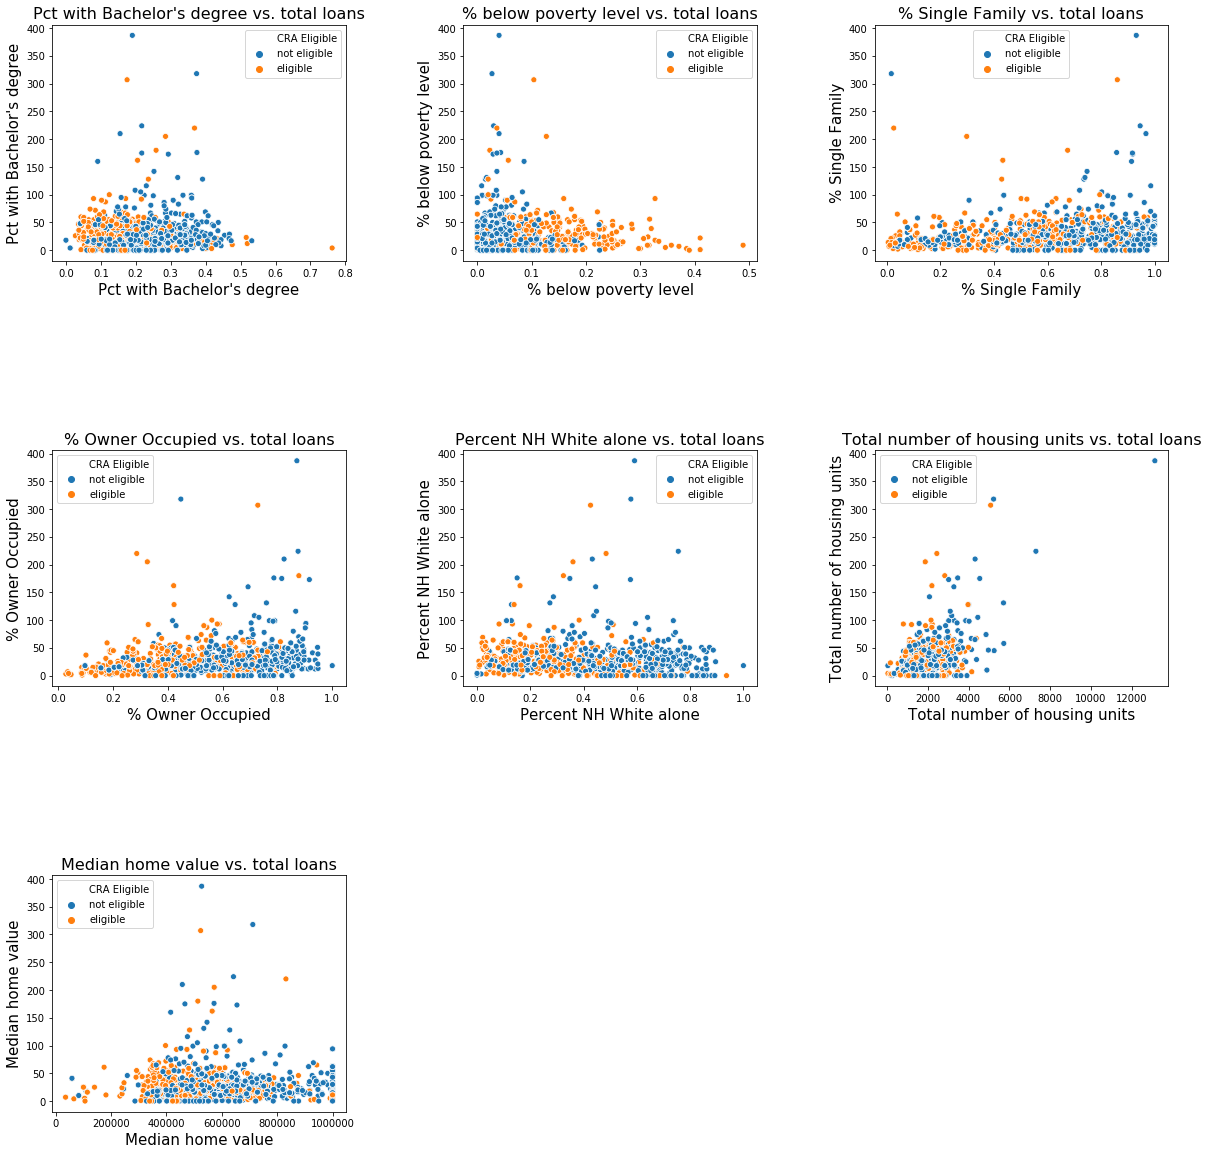

In [224]:
covariates = np.array(["Pct with Bachelor's degree","% below poverty level",
      "% Single Family", "% Owner Occupied", "Percent NH White alone", "Total number of housing units", 
                 "Median home value","Median income", "Total Loans", "Per"])
fig = plt.figure(figsize=(20,20))

fig.subplots_adjust(hspace=0.8, wspace=0.4)
# fig.suptitle('Covariates vs. Number of Loans (2009) by CRA Eligibility', fontsize=20)
for i in range(1, 8):
    ax = fig.add_subplot(3, 3, i)
    
    scatter1 = sns.scatterplot(data=data_09, x=covariates[i-1], y="Total Loans", hue="CRA Eligible")
    title = str(covariates[i-1])+" vs. total loans"
    plt.title(title, fontsize=16)
    ax.set_xlabel(covariates[i-1],fontsize = 15) #xlabel
    ax.set_ylabel(covariates[i-1], fontsize = 15)#ylabel

plt.savefig(plots_filepath+ "Covariates_numloans_scatter.png")




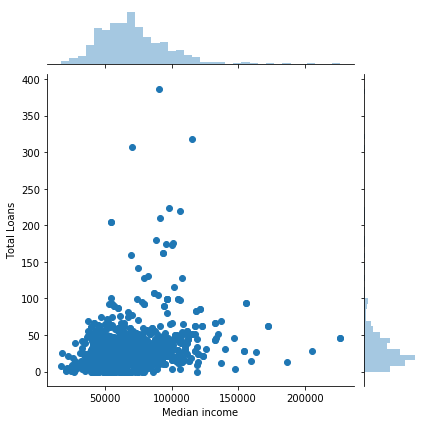

In [32]:
sns.jointplot(data=data_09, x="Median income", y="Total Loans")

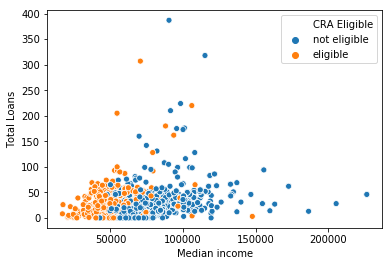

In [33]:
sns.scatterplot(data=data_09, x="Median income", y="Total Loans", hue="CRA Eligible")

In [1]:
# plt.figure(figsize=(10,6))
# plt.title("% Loans to MHI borrowers by CRA Eligibility")
# sns.boxplot("CRA Eligibility", "% Loans to MHI borrowers", data=all_vars_09)
# plt.xticks(rotation=90)
# plt.show()


In [60]:
ref_path = "/Users/ameliabaum/Desktop/Amelia/CRA_Thesis/data/reference/"

In [120]:
master = pd.read_csv(ref_path+"tracts_type_master_1.csv")
master_9up = master[master["Year"]!= 2008]

master09 = master[master["Year"] == 2009]
master09["pct_mhi"] = (master09["# HI borrower, HI tract"]+ master09["# HI borrower, LI tract"])/(master09["# HI borrower, HI tract"]+ master09["# HI borrower, LI tract"]+master09["# LI borrower, HI tract"] +master09["# LI borrower, LI tract"])


master13 = master[master["Year"] == 2013]
master13["pct_mhi"] = (master13["# HI borrower, HI tract"]+ master13["# HI borrower, LI tract"])/(master13["# HI borrower, HI tract"]+ master13["# HI borrower, LI tract"]+master13["# LI borrower, HI tract"] +master13["# LI borrower, LI tract"])



master15 = master[master["Year"] == 2015]
master15["pct_mhi"] = (master15["# HI borrower, HI tract"]+ master15["# HI borrower, LI tract"])/(master15["# HI borrower, HI tract"]+ master15["# HI borrower, LI tract"]+master15["# LI borrower, HI tract"] +master15["# LI borrower, LI tract"])

master15.head()


/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ameliabaum/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Geoid,Tract,Year,type,County,CRA Eligible,inc_ratio,"# HI borrower, LI tract","# HI borrower, HI tract","# LI borrower, LI tract","# LI borrower, HI tract",pct_mhi
0,6013301000,3010.00,2015,mid,Contra Costa County,not eligible,82.510002,0,82,0,14,0.854167
1,6013302005,3020.05,2015,mid,Contra Costa County,not eligible,85.599998,0,35,0,30,0.538462
2,6013302006,3020.06,2015,mid,Contra Costa County,not eligible,95.730003,0,21,0,24,0.466667
3,6013302007,3020.07,2015,mid,Contra Costa County,not eligible,81.199997,0,59,0,26,0.694118
4,6013302008,3020.08,2015,mid,Contra Costa County,not eligible,83.910004,0,74,0,21,0.778947


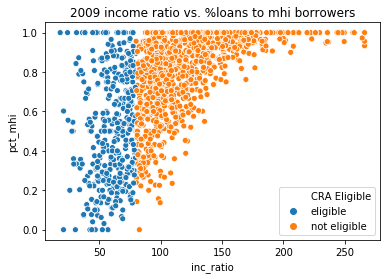

In [83]:
master09_1 = master09[["Geoid", "inc_ratio", "pct_mhi", "CRA Eligible"]]
sns.scatterplot(x="inc_ratio", y="pct_mhi", hue="CRA Eligible", data=master09_1);
plt.title("2009 income ratio vs. %loans to mhi borrowers");


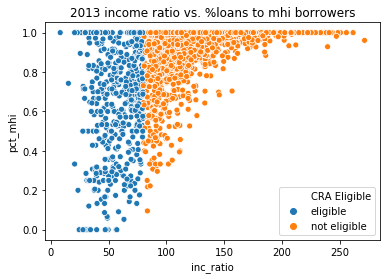

In [100]:
master13_1 = master13[["Geoid", "inc_ratio", "pct_mhi", "CRA Eligible"]]
sns.scatterplot(x="inc_ratio", y="pct_mhi", hue="CRA Eligible", data=master13_1);
plt.title("2013 income ratio vs. %loans to mhi borrowers");


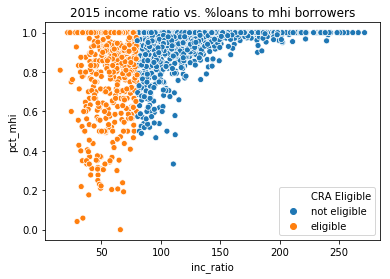

In [99]:
master15_1 = master15[["Geoid", "inc_ratio", "pct_mhi", "CRA Eligible"]]
sns.scatterplot(x="inc_ratio", y="pct_mhi", hue="CRA Eligible", data=master15_1);
plt.title("2015 income ratio vs. %loans to mhi borrowers");


#### Tracts by Eligibility

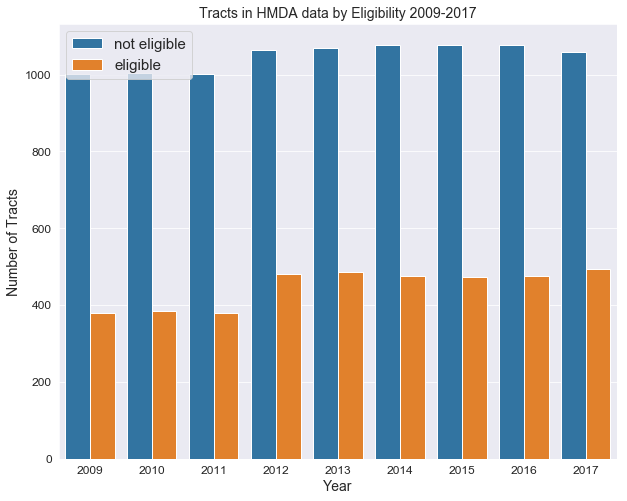

In [123]:
# df = pd.DataFrame(zip(x*3, ["y"]*3+["z"]*3+["k"]*3, y+z+k), columns=["time", "kind", "data"])
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')

ax = sns.countplot(x="Year", hue="CRA Eligible", data=master_9up)
plt.title("Tracts in HMDA data by Eligibility 2009-2017", fontsize=14)
ax.set_xlabel("Year", fontname="Arial", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc=2, prop={'size': 15})


ax.set_ylabel("Number of Tracts", fontname="Arial", fontsize=14)
plt.savefig(plots_filepath+"tracts_by_elig.png")

#### Num low income tracts by county

In [167]:
grouped = master09.groupby(["County","CRA Eligible"])[["Geoid"]].agg('nunique')
grouped = grouped.rename({"Geoid": "Num tracts"}, axis=1)
grouped

Num tracts
County               CRA Eligible            
Alameda County       eligible             108
                     not eligible         205
Contra Costa County  eligible              41
                     not eligible         126
Marin County         eligible               4
                     not eligible          46
Napa County          eligible               6
                     not eligible          20
San Francisco County eligible              75
                     not eligible          96
San Mateo County     eligible              26
                     not eligible         127
Santa Clara County   eligible              81
                     not eligible         245
Solano County        eligible              24
                     not eligible          54
Sonoma County        eligible              12
                     not eligible          74

In [168]:
master_1314 = master[master["Year"].isin([2013, 2014])]
grouped1314 = master_1314.groupby(["County","CRA Eligible"])[["Geoid"]].agg('nunique')
grouped1314 = grouped.rename({"Geoid": "Num tracts"}, axis=1)
grouped1314

Num tracts
County               CRA Eligible            
Alameda County       eligible             108
                     not eligible         205
Contra Costa County  eligible              41
                     not eligible         126
Marin County         eligible               4
                     not eligible          46
Napa County          eligible               6
                     not eligible          20
San Francisco County eligible              75
                     not eligible          96
San Mateo County     eligible              26
                     not eligible         127
Santa Clara County   eligible              81
                     not eligible         245
Solano County        eligible              24
                     not eligible          54
Sonoma County        eligible              12
                     not eligible          74